In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

In [77]:
import math

def linear_regression(x,y):
    n = len(y)
    sum_x = 0
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    sum_yy = 0
    
    for i in range(len(y)):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += (x[i] * y[i])
        sum_xx += (x[i] * x[i])
        sum_yy += (y[i] * y[i])
        
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x)
    intercept = (sum_y - slope * sum_x) / n
    r2 = math.pow((n * sum_xy - sum_x * sum_y) / math.sqrt((n * sum_xx - sum_x * sum_x) * (n * sum_yy - sum_y * sum_y)), 2)
    print("slope: ", slope)
    print("intercept: ", intercept)
    print("R2: ", r2)

    regression = []
    for i in range(len(x)): 
        regression.append(intercept + slope * x[i])
    
    return regression, intercept, slope


def predict(n, x, y):
    regression, intercept, slope = linear_regression(x, y)

    x_predict = []
    
    diff = (x[-1]) - (x[-2])
    value = x[-1]
    for i in range(n):
        value += diff
        x_predict.append(value)

    prediction = []
    for i in range(len(x_predict)): 
        prediction.append(intercept + slope * x_predict[i]) 

    return regression, prediction   

In [14]:
def data_prep(values):
    new_dates = []
    for value in values:
        new_dates.append((datetime.strptime(value, "%Y-%m-%d").date() - datetime.strptime("2023-01-01", "%Y-%m-%d").date()).days)

    return new_dates

In [11]:
# dummy df
df = pd.read_csv('dados_sensor.csv')

In [12]:
df.head()

,sensor,temperatura,data
0,BMP180,23.23,2023-01-01
1,BMP180,20.28,2023-01-02
2,BMP180,23.28,2023-01-03
3,BMP180,24.25,2023-01-04
4,BMP180,20.25,2023-01-05


In [15]:
df['new_data'] = data_prep(df['data'])
df.head()

,sensor,temperatura,data,new_data
0,BMP180,23.23,2023-01-01,0
1,BMP180,20.28,2023-01-02,1
2,BMP180,23.28,2023-01-03,2
3,BMP180,24.25,2023-01-04,3
4,BMP180,20.25,2023-01-05,4


In [39]:
line = linear_regression(x=df['new_data'], y=df['temperatura'])

slope:  -0.012957335733573133
intercept:  23.063588118811857
R2:  0.01778622450302642


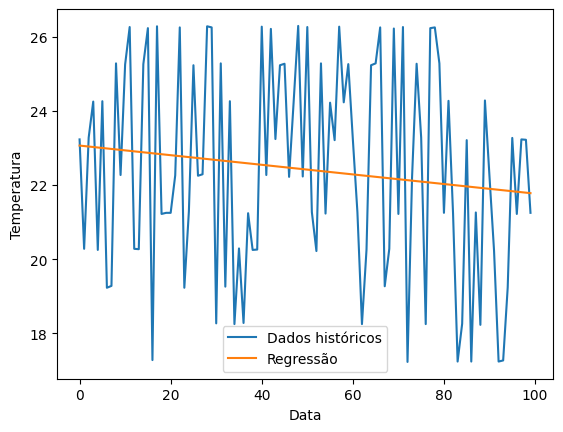

In [40]:
import matplotlib.pyplot as plt
plt.plot(df['new_data'], df['temperatura'], label='Dados históricos')
plt.plot(df['new_data'], line, label='Regressão')

plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

In [78]:
line, prediction = predict(20, x=list(df['new_data']), y=list(df['temperatura']))

slope:  -0.012957335733573133
intercept:  23.063588118811857
R2:  0.01778622450302642


In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividir os df em variáveis de entrada (X) e saída (y)
X = df[['new_data']]  # data e hora dos registros
y = df['temperatura']  # temperatura registrada

# Dividir os df em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os df de treinamento
modelo.fit(X_train, y_train)

# Fazer previsões com base nos df de teste
previsoes = modelo.predict(X_test)

score = modelo.score(X_test, y_test)
print('Score do modelo:', score)

Score do modelo: 0.009546865695365114


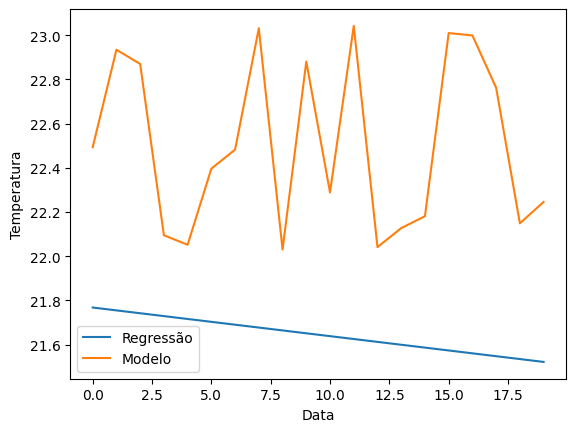

In [79]:
plt.plot([i for i in range(20)], prediction, label='Regressão')
plt.plot([i for i in range(20)], previsoes, label='Modelo')

plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()